# MNIST HANDWRITTEN DIGIT CLASSIFICATION USING DEEP LEARNONG OR NEURAL NETWORK

## Loading the Libraries

In [33]:
# importing libraries

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image                   # pillow library for image processing
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from google.colab.patches import cv2_imshow

## Loading the datasets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# getting the shape of the data

print(f'the shape of x train is {x_train.shape}')
print(f'the shape of y train is {y_train.shape}')
print(f'the shape of x test is {x_test.shape}')
print(f'the shape of y test is {y_test.shape}')

the shape of x train is (60000, 28, 28)
the shape of y train is (60000,)
the shape of x test is (10000, 28, 28)
the shape of y test is (10000,)


we have 60,000 train images of dimension of 28x28 \
we have 10,000 test image of dimension 28x28

In [4]:
# getting the type of data(image)

type(x_train)

numpy.ndarray

In [5]:
# getting the unique target values present

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

there are 10 images of numbers from 0 - 9

In [6]:
# getting a sample from the data

x_train[22]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  31, 144, 250, 254, 166,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  98, 241, 204,  97, 126, 253,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
        121, 247, 133,  16,   0,  50, 253,  27,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103,
        253, 109,   0,   0,   0, 120, 231,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 234,
        169,   4,   0,   0,  31, 220, 231,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4, 215, 212,
         18,   0,   0,   0, 195, 254, 139,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 253,  63,
          0,   0,   0,  90, 251, 242,  23,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 214,   5,
          0,   0,  24, 233, 253, 133,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 254, 124,   0,
          0,  14, 197, 253, 149,  14,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  67, 254,  45,   0,
         71, 224, 254, 218,  15,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 246, 214, 227,
        248, 241, 255, 111,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  94, 193, 167,
         78, 226, 189,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
        145, 249,  53,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,
        253, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 230,
        227,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  52, 250,
        104,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 206, 223,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 105, 253,  45,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [8]:
# converting the sample numpy array into image

cv2_imshow(x_train[22])

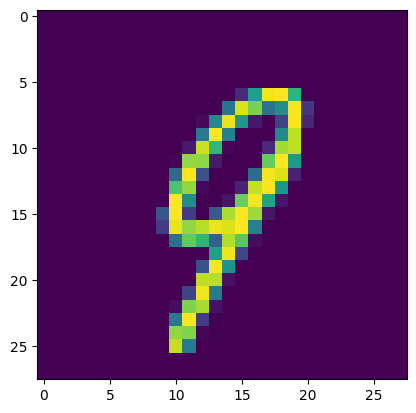

In [9]:
plt.imshow(x_train[22])

## Data Preprocessing

In [11]:
# scaling the data from 0-255 to 0-1

x_train = x_train/255
x_test = x_test/255

In [13]:
x_train[22]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Building the Neural Network

In [22]:
model = Sequential()

# adding layers

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

# getting the summary

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# compiling the model

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [24]:
# training the model

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8521 - loss: 0.5057
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9559 - loss: 0.1500
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9679 - loss: 0.1057
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9753 - loss: 0.0793
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.9795 - loss: 0.0645
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9823 - loss: 0.0560
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9857 - loss: 0.0451
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - acc: 0.9870 - loss: 0.0406
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9885 - loss: 0.0373
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9905 - loss: 0.0316


the training Accuracy = 99.05%

In [25]:
# evaluating the model on test data

model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9724 - loss: 0.1080


[0.09431368857622147, 0.9757999777793884]

the test Accuracy = 97.57%

In [26]:
# predicting using the model

y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [27]:
# checking a prediction sample
y_pred[0]

array([1.2665296e-04, 3.2875997e-01, 9.4612747e-01, 9.7927219e-01,
       1.0021851e-05, 2.3132868e-01, 1.9728799e-09, 9.9999976e-01,
       3.4478897e-01, 3.9923519e-02], dtype=float32)

In [28]:
# checking the actual sample
y_test[0]

7

In [29]:
# converting the y_pred into label

np.argmax(y_pred[0])

7

In [30]:
# getting label for the y_pred

y_pred_label = [np.argmax(i) for i in y_pred]

In [32]:
y_pred_label[2], y_test[2]

(1, 1)

In [34]:
# getting the confusion matrix for the test data prediction

con_mat = tf.math.confusion_matrix(y_test, y_pred_label)

In [35]:
con_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    2,    1,    1,    3,    2,    1,    2,    0],
       [   0, 1125,    2,    4,    0,    1,    1,    1,    1,    0],
       [   4,    1, 1009,    3,    0,    0,    1,    9,    4,    1],
       [   0,    0,    2, 1000,    0,    4,    0,    3,    1,    0],
       [   0,    0,    6,    0,  957,    0,    1,    5,    1,   12],
       [   2,    0,    1,   38,    1,  838,    6,    1,    4,    1],
       [   5,    3,    1,    1,    2,    4,  938,    0,    4,    0],
       [   1,    4,   10,    6,    1,    1,    0,  999,    3,    3],
       [   2,    1,    2,   13,    4,    4,    3,    4,  937,    4],
       [   2,    2,    0,   10,    9,    6,    0,    4,    1,  975]],
      dtype=int32)>

Text(120.72222222222221, 0.5, 'Actual Label')

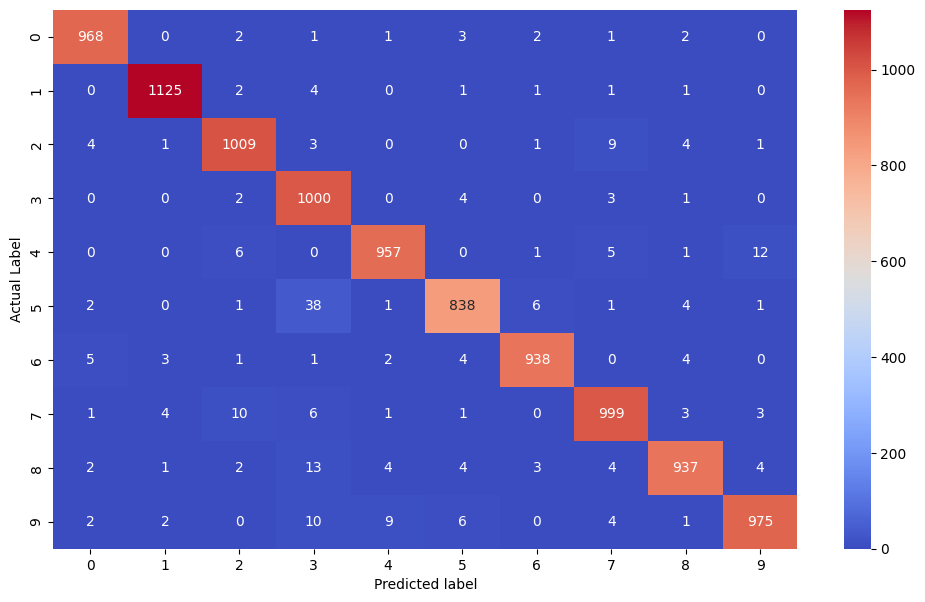

In [39]:
# creating heatmap for confusion matrix

plt.figure(figsize= (12,7))

sns.heatmap(con_mat, annot=True, fmt ='d', cmap='coolwarm')

plt.xlabel('Predicted label')
plt.ylabel('Actual Label')